# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load the dataset

In [2]:
car_data = pd.read_csv('dataset/car data.csv')
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data profiling

In [3]:
from pandas_profiling import ProfileReport
profile = ProfileReport(car_data, title='Car Price Data Report')

In [4]:
profile.to_file('Car_Price_Data_Report.html')

# EDA

In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


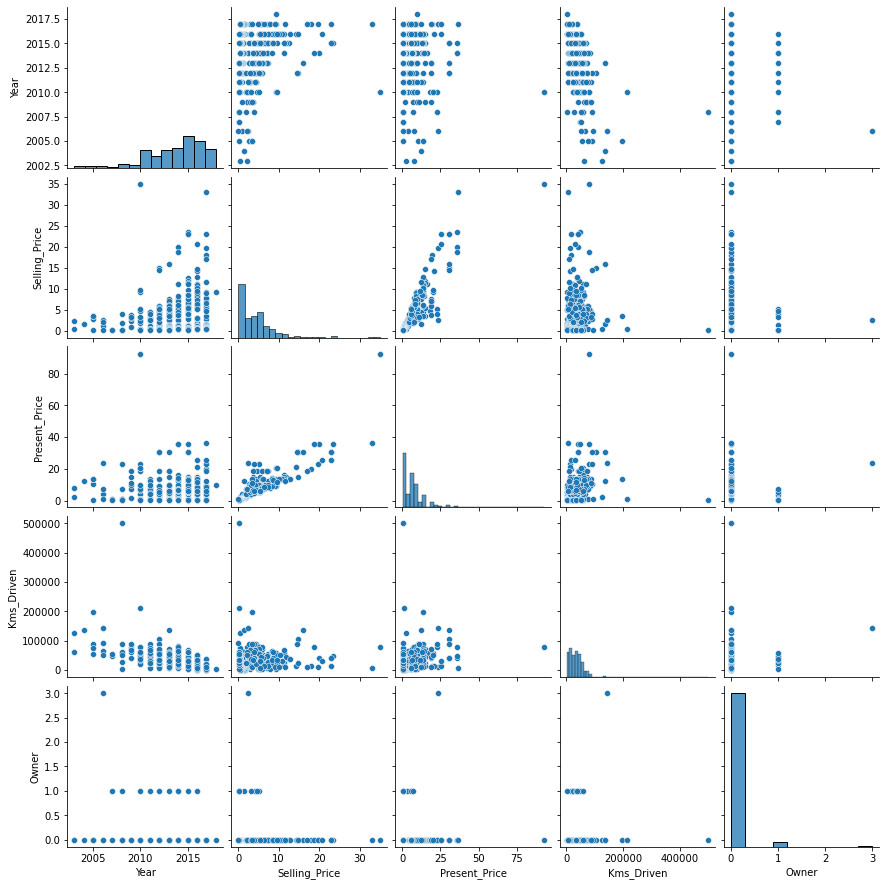

In [7]:
sns.pairplot(car_data)

In [8]:
car_data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

<AxesSubplot:>

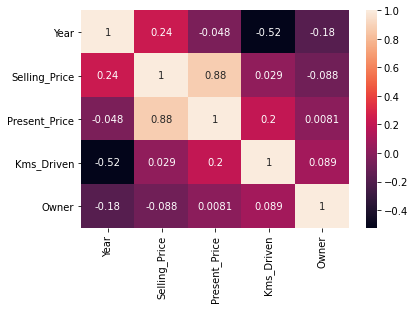

In [9]:
sns.heatmap(car_data.corr(), annot=True)

<AxesSubplot:xlabel='Owner', ylabel='Selling_Price'>

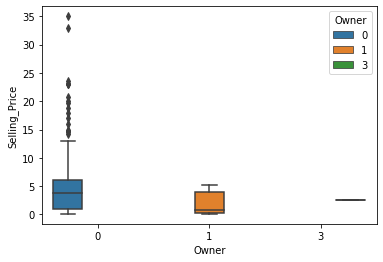

In [10]:
sns.boxplot(x='Owner', y='Selling_Price', hue='Owner', data=car_data)

In [11]:
car_data = car_data[car_data['Selling_Price'] < 15]

<AxesSubplot:xlabel='Owner', ylabel='Selling_Price'>

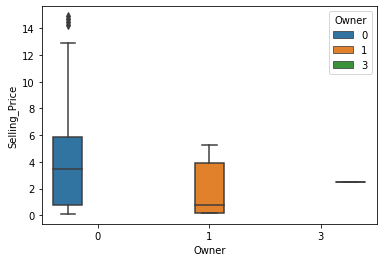

In [12]:
sns.boxplot(x='Owner', y='Selling_Price', hue='Owner', data=car_data)

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

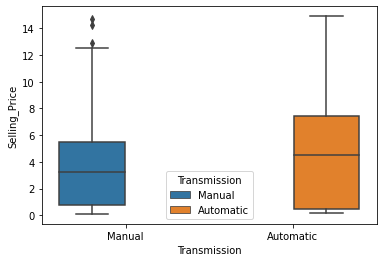

In [13]:
sns.boxplot(x='Transmission', y='Selling_Price', hue='Transmission', data=car_data)

<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

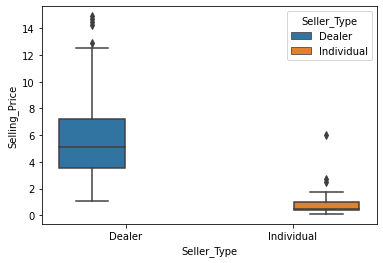

In [14]:
sns.boxplot(x='Seller_Type', y='Selling_Price', hue='Seller_Type', data=car_data)

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

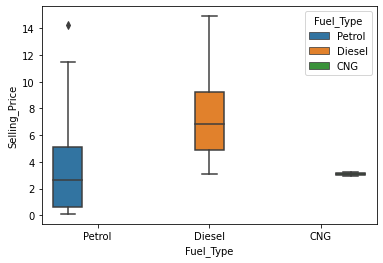

In [15]:
sns.boxplot(x='Fuel_Type', y='Selling_Price', hue='Fuel_Type', data=car_data)

In [16]:
final_car_data = car_data[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [17]:
final_car_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Converting year to number of years

In [18]:
final_car_data['Current_Year'] = 2021

In [19]:
final_car_data['Number_Of_Years'] = final_car_data['Current_Year'] - final_car_data['Year']

In [20]:
final_car_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Number_Of_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [21]:
final_car_data.drop(['Year', 'Current_Year'], axis=1, inplace=True)

In [22]:
final_car_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_Of_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


### Converting categorical data into numerical data using encoding

In [23]:
final_car_data = pd.get_dummies(final_car_data, drop_first=True)

In [24]:
final_car_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_Of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


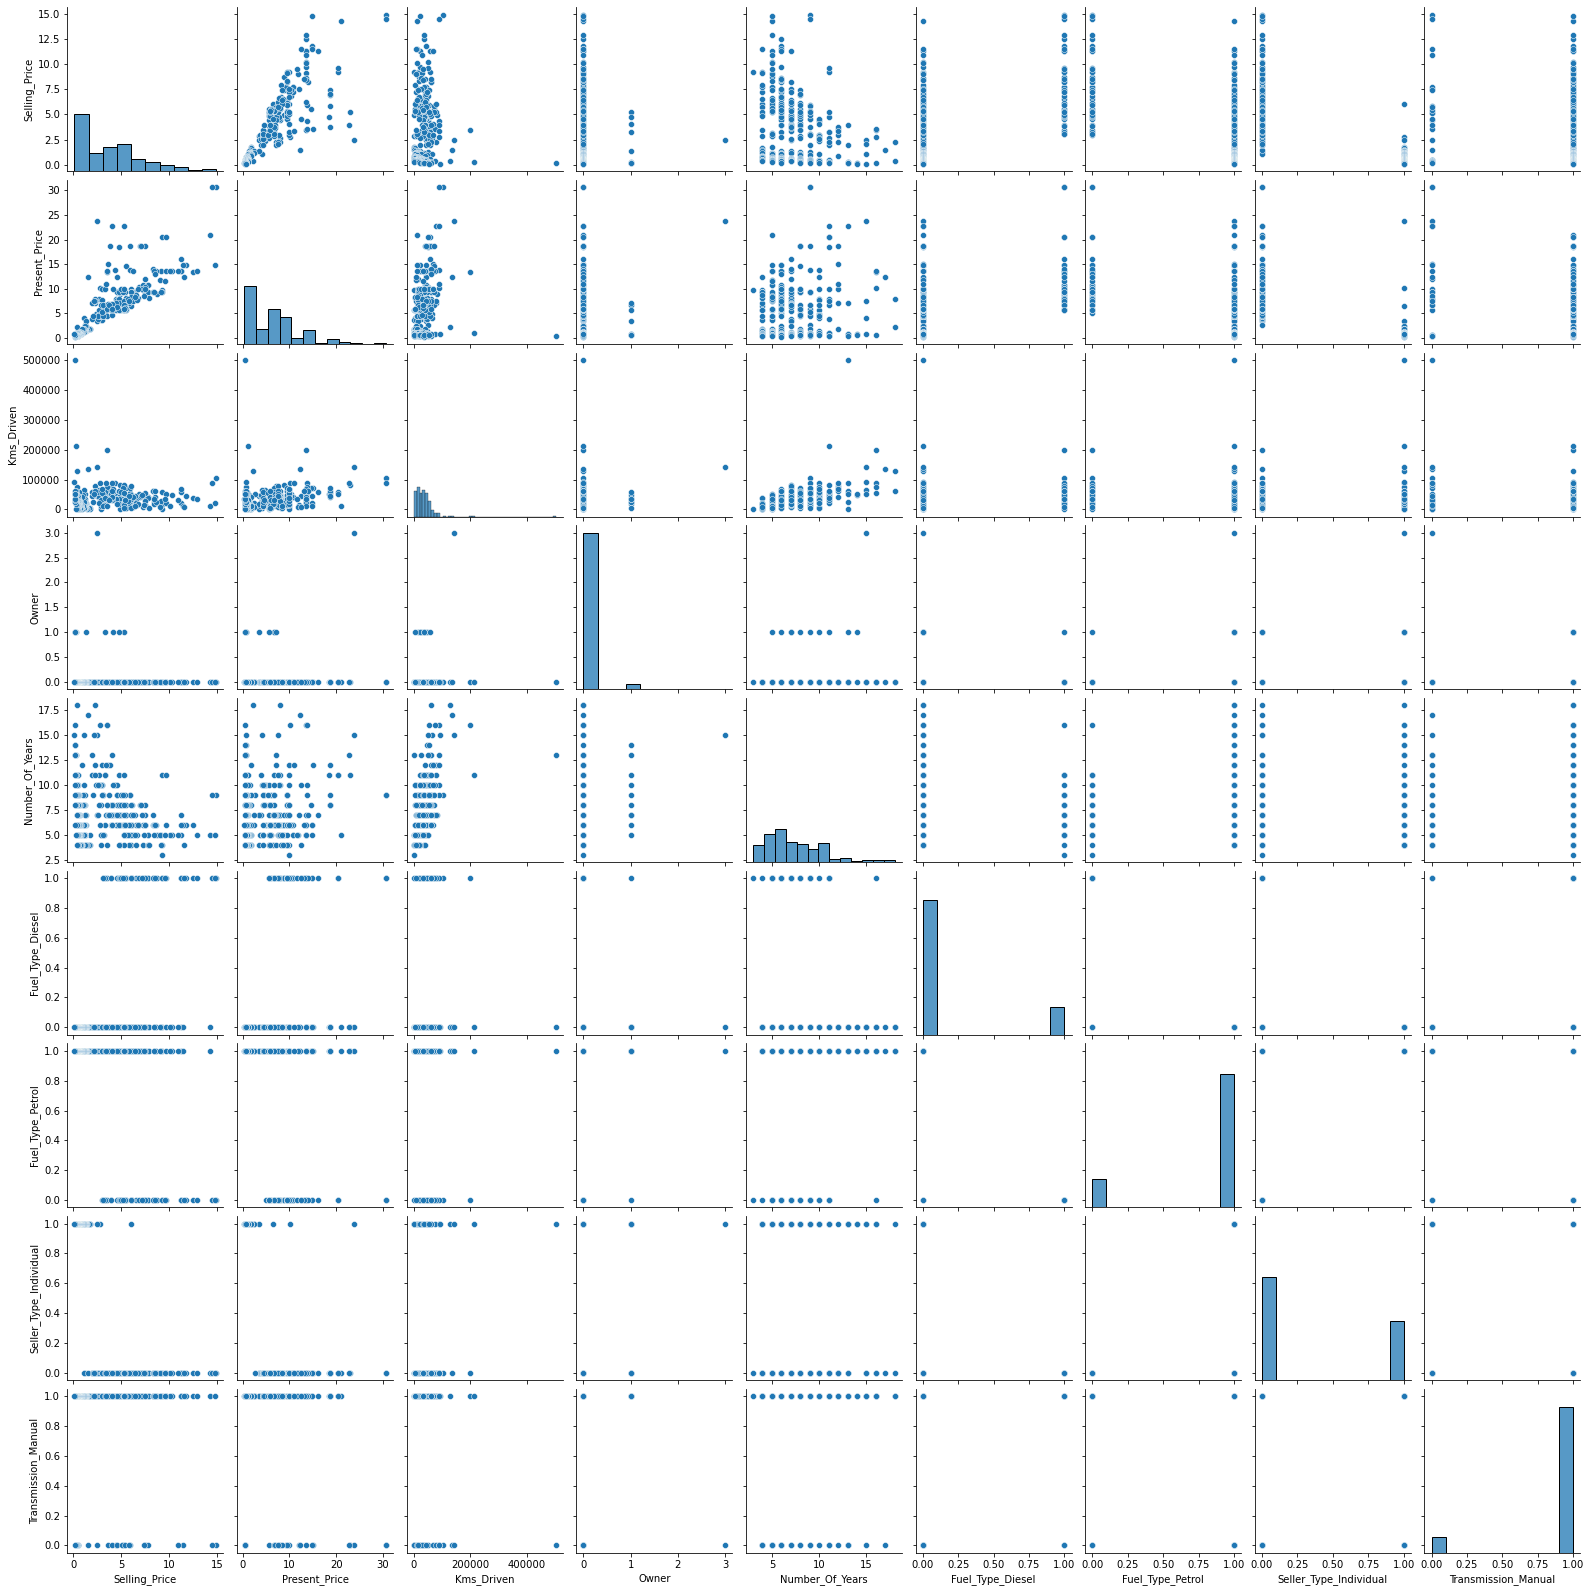

In [25]:
sns.pairplot(final_car_data)

In [26]:
final_car_data.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Number_Of_Years', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

# Dividing data into features and target columns

In [27]:
X = final_car_data[['Present_Price', 'Kms_Driven', 'Owner',
       'Number_Of_Years', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual']]
y = final_car_data['Selling_Price']

### Maximum and Minimum Selling Price

In [28]:
print("Maximum Selling Price: ", max(y))
print("Minimum Selling Price: ", min(y))

Maximum Selling Price:  14.9
Minimum Selling Price:  0.1


# Split data into train and test

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a model using Decision Tree Regressor

In [30]:
from sklearn.tree import DecisionTreeRegressor
des_tree_model = DecisionTreeRegressor()
des_tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

# Predict from the model

In [31]:
y_pred = des_tree_model.predict(X_test)

In [32]:
y_pred

array([ 7.2 ,  0.5 ,  7.5 ,  3.25,  0.38,  5.95,  4.  ,  0.3 ,  7.45,
        5.85,  9.25,  7.2 ,  0.75,  6.  ,  7.05,  3.9 ,  7.25,  8.55,
       12.5 ,  9.25,  5.5 ,  7.45,  0.72,  9.25,  5.65,  6.25,  0.6 ,
        0.45,  1.1 ,  7.45,  1.11,  0.16,  0.45,  6.25,  0.1 ,  0.45,
        6.15,  0.48,  5.11,  0.65,  0.4 ,  8.75,  0.3 ,  0.5 ,  3.9 ,
        2.9 ,  2.55,  0.4 ,  0.65,  0.2 ,  5.4 ,  3.9 ,  1.05,  2.85,
        0.25,  0.12,  5.4 ,  5.8 ,  2.  ,  6.45,  4.1 ,  3.95,  2.7 ,
        3.75,  0.48,  5.3 ,  2.9 ,  4.1 ,  1.2 ,  7.75,  3.  ,  5.11,
        7.45,  1.15,  0.9 ,  7.45,  4.4 ,  4.5 ,  3.25,  3.75,  3.6 ,
        0.6 ,  4.95,  0.75,  2.9 ,  1.65,  3.35])

# Performance measure of the model

D:\Programs\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

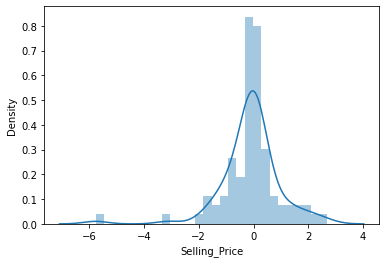

In [33]:
sns.distplot((y_test - y_pred))

In [34]:
from sklearn import metrics

def performance_measure(true, predict):
    mae = metrics.mean_absolute_error(true, predict)
    mse = metrics.mean_squared_error(true, predict)
    rmse = np.sqrt(mse)
    r2_score = metrics.r2_score(true, predict)
    print('===============================================')
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Score:', r2_score)
    print('===============================================')

In [35]:
performance_measure(y_test, y_pred)

MAE: 0.6466666666666666
MSE: 1.1631747126436782
RMSE: 1.0785057777516438
R2 Score: 0.8695528830814019


In [36]:
from sklearn.model_selection import cross_val_score

def cv_score(model, X, y):
    pred = cross_val_score(model, X, y, cv=10)
    print(pred)
    print('===============================================')
    print('Cross Validation Score:', pred.mean())
    print('===============================================')

### Cross Validation Score for all the data

In [37]:
cv_score(des_tree_model, X, y)

[ 0.86429139  0.90888511  0.65634365 -7.19404379 -3.49036634 -4.66113028
  0.95660768  0.85077255  0.87035691  0.61923418]
Cross Validation Score: -0.9619048942200878


### Cross Validation Score for the train data

In [38]:
cv_score(des_tree_model, X_train, y_train)

[0.93733332 0.82166572 0.87318374 0.8968687  0.89834757 0.49838621
 0.91475773 0.91241215 0.93966886 0.95011366]
Cross Validation Score: 0.8642737654232334


### Cross Validation Score for the test data

In [39]:
cv_score(des_tree_model, X_test, y_test)

[0.92816041 0.56090658 0.95904892 0.84991115 0.82655734 0.7628173
 0.90286158 0.55269841 0.90619247 0.52335365]
Cross Validation Score: 0.7772507791596988
